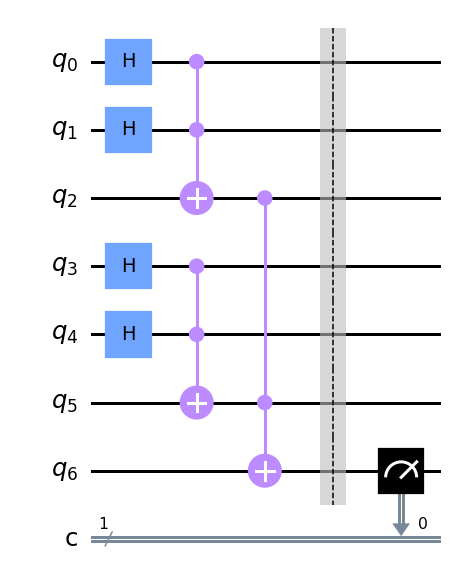

<IPython.core.display.Latex object>

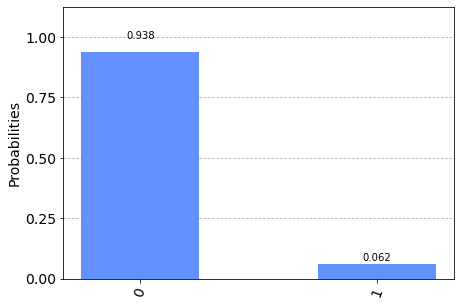

In [2]:
# quantum_circuit3.ipynb

import matplotlib.pyplot as plt
import numpy as np
import qiskit
from IPython.display import Math
from qiskit import (
    Aer,
    ClassicalRegister,
    QuantumCircuit,
    QuantumRegister,
    assemble,
    execute,
)
from qiskit.quantum_info import Statevector
from qiskit.visualization import (
    array_to_latex,
    plot_bloch_multivector,
    plot_histogram,
    plot_state_qsphere,
)

backend = Aer.get_backend("aer_simulator")
qc = QuantumCircuit(7, 1) #seven qubits, 1 classical bit

qc.h(0) #hadamards on qubits 0 through 4
qc.h(1)
qc.h(3)
qc.h(4)
qc.ccx(0, 1, 2) #three ccx gates
qc.ccx(3, 4, 5)
qc.ccx(2, 5, 6)

qc.save_statevector() #save the final statevector

qc.measure(6, 0) #measuring qubit 6

result = execute(qc, backend, shots=100_000).result() #100,000 runs of this circuit
counts = result.get_counts()

sv = result.get_statevector()

display(qc.draw(output="mpl", scale=1.5))

display(array_to_latex(sv, prefix="\\text{Statevector 4} = "))

plot_histogram(counts)

#A qubit, after going through a hadamard, has  50% chance of being a 0 or 1. Since q2 needs
# q0 and q1 to be a 1 in order to fire, q2 has a 25% chance of being 1. Same situation for
# qubits 3 through 5. q6 has the steepest odds of ever being a 1, because of how the 
#probabilities compound. q2 has a 1/4 chance of being a 1, same for q5, therefore
#q6 has a 1/16 or 0.0625% chance of being a 1. The more shots we take, the closer
#the observed probability will reach 0.0625 (because statistics).